In [1]:
# Imports for queries
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
import astropy.units as u
import observation_planning as op
from astropy.coordinates import SkyCoord, Angle

# Imports for astroplan plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from astroplan import Observer, FixedTarget
from astropy.time import Time
from datetime import timezone  # Importing timezone
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy import units as u


# Display RA & Dec of Science Target

In [10]:
identifier = "Europa"
target_num = "502" #Europa
loc = "568" #Subaru Observatory
obsdate = "2025-02-09"
obstime = "03:00"
ra, dec = op.query_horizons(target_num,loc,obsdate,obstime)

RA: 04h37m37.1712s, Dec: +21d37m11.64s


# Query Heiles (2000) for Unpolarized Standards

In [28]:
ra_range = 1 * u.hourangle
dec_range = 5 * u.deg
columns_to_display = ["HD", "RA (J2000)", "Dec (J2000)", "HD", "Vmag", "Pol", "e_Pol", "WDSC"]

heiles_filename = "heiles_2000_wdsc_catalog.csv"

result = op.query_csv(heiles_filename, ra_range = (ra - ra_range, ra + ra_range), 
    dec_range = (dec - dec_range, dec + dec_range), columns = columns_to_display,
    brightness_range = (4, 8), 
    max_pol = 0.1, sort_by = "Pol", ascending = True)

print("Number of sources found: ", len(result))
print(result)

Number of sources found:  10
           HD RA (J2000)   Dec (J2000)       HD  Vmag   Pol  e_Pol WDSC
5912  35532.0    5:26:06  +16:42:00.36  35532.0   6.2  0.00   0.20   No
6204  25680.0    4:05:20  +22:00:33.12  25680.0   5.9  0.00   0.20   No
6339  36819.0    5:35:27  +24:02:22.56  36819.0   5.3  0.00   0.20   No
6372  23288.0    3:44:48   +24:17:22.2  23288.0   5.4  0.00   0.20   No
5965  27962.0    4:25:29  +17:55:40.44  27962.0   4.3  0.03   0.12   No
6245  28024.0    4:26:18  +22:48:48.96  28024.0   4.3  0.03   0.12   No
5942  27819.0    4:24:06  +17:26:39.12  27819.0   4.8  0.04   0.12   No
6154  27295.0    4:19:26  +21:08:32.64  27295.0   5.3  0.07   0.12   No
6121  27045.0    4:17:16  +20:34:43.32  27045.0   4.9  0.08   0.12   No
6217  27934.0    4:25:22  +22:17:38.04  27934.0   4.2  0.10   0.12   No


# Query Whittet (1992) for Polarized Standards

In [37]:
ra_range = 1 * u.hourangle
dec_range = 10 * u.deg
columns_to_display = ["Star", "RA (J2000)", "Dec (J2000)", "J", "P% (J)", 
                    "P% error (J)", "PA (J)", "WDSC"]

heiles_filename = "whittet_1992_wdsc_catalog.csv"

result = op.query_csv(heiles_filename, ra_range = (ra - ra_range, ra + ra_range), 
    dec_range = (dec - dec_range, dec + dec_range), columns = columns_to_display)

print("Number of sources found: ", len(result))
print(result)

Number of sources found:  19
                 Star    RA (J2000)    Dec (J2000)      J  P% (J)  \
2    Elias 1 (Taurus)  4 18 40.7003  28 19 15.8537  8.742    4.30   
3    Elias 3 (Taurus)   4 23 24.615   25 00 08.997   8.33    1.79   
4    Elias 9 (Taurus)  4 32 11.5165   24 33 37.764  7.591    0.44   
5   Elias 19 (Taurus)  4 44 17.9389  25 24 51.3428  7.689    3.06   
6   Elias 29 (Taurus)  4 37 15.1349  25 17 30.2445   7.39    2.43   
7            HD 28170  4 27 34.0241  25 03 42.4034  7.708    1.03   
8            HD 28975  4 34 50.1374  24 14 40.0375  7.425    1.77   
9            HD 29333  4 38 25.9484  29 23 13.6063  7.145    2.88   
10           HD 29647   4 41 07.969  25 59 35.3964   5.96    1.70   
11           HD 29835   4 43 05.105  26 14 36.3816  5.767    1.82   
12           HD 30168  4 46 12.0706  26 02 09.5121  6.894    2.17   
13           HD 30675   4 50 51.977  28 18 51.2518  6.717    1.90   
16         HDE 283637  4 25 58.9255  27 37 03.8517  9.545    1.57   
17   

In [13]:
# Location of Mauna Kea
location = EarthLocation(lat=19.8262*u.deg, lon=-155.471*u.deg, height=4205*u.m)

# Date and time of observation in UTC
observation_time = Time('2025-02-09 09:00:00')  # 5 AM local time corresponds to 15:00 UTC

# RA and Dec of the target
target = SkyCoord(ra=ra, dec=dec)

# Calculate Altitude and Azimuth
altaz_frame = AltAz(obstime=observation_time, location=location)
altaz = target.transform_to(altaz_frame)

# Parallactic angle calculation
parallactic_angle = altaz.az.rad * u.rad.to(u.deg)

altitude = altaz.alt.deg

print(f"Altitude: {altitude:.2f} degrees")
print(f"Parallactic Angle: {parallactic_angle:.2f} degrees")


Altitude: 43.91 degrees
Parallactic Angle: 281.41 degrees


# Plot Target and Standards with Astroplan

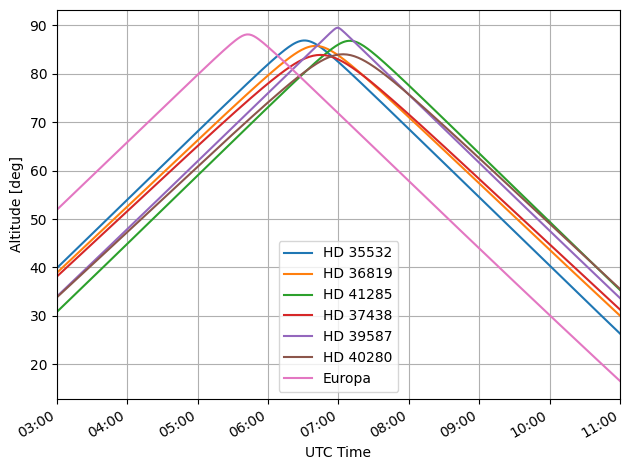

In [30]:
subaru = Observer.at_site("Subaru")
# Example science target with polarized and unpolarized standard

unpol_standard = "HD 35532"
# List of targets
targets = [unpol_standard, "HD 36819", "HD 41285", "HD 37438", "HD 39587", "HD 40280"]

# Start and end observation times in UTC
start_time = "2025-02-09 3:00:00" 
end_time = "2025-02-09 11:00:00" 

# Plot the airmass curves
op.plot_altitude_for_targets(subaru.location, targets, start_time, end_time,
    filename = "Europa" + "_unpol_altitude_plot",ssobj=['502','568','Europa'])

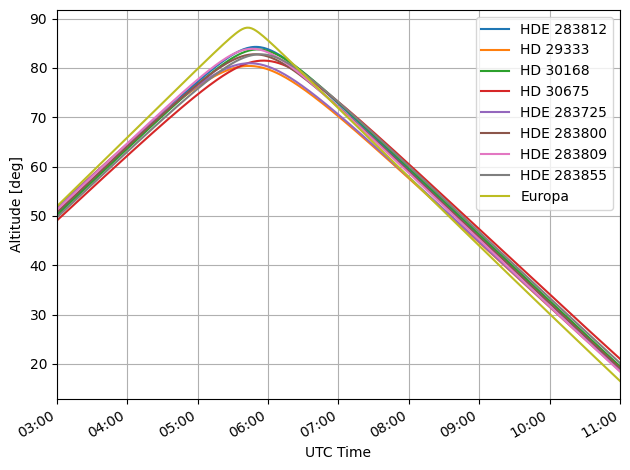

In [40]:
pol_standard = "HDE 283812"

# List of targets
targets = [pol_standard, "HD 29333", "HD 30168", "HD 30675", "HDE 283725", "HDE 283800", "HDE 283809", "HDE 283855"]

# Plot the airmass curves
op.plot_altitude_for_targets(subaru.location, targets, start_time, end_time,
    filename = "Europa" + "_pol_altitude_plot",ssobj=['502','568','Europa'])